In [16]:
# We start with a clean conda install with python 3.8
import sys
!which {sys.executable}
!{sys.executable} -m pip install -U pip pandas sklearn matplotlib

/home/xyntek/miniconda3/envs/datascience/bin/python3
     |████████████████████████████████| 1.5 MB 866 kB/s eta 0:00:01
Requirement already up-to-date: pandas in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (1.0.4)
Requirement already up-to-date: sklearn in /home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages (0.0)
     |████████████████████████████████| 12.4 MB 1.6 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 92 kB 156 kB/s eta 0:00:01
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


In [7]:
import pandas as pd
data = pd.read_pickle("./data_other.pkl")
data.head()

,Anteil Bruttoarbeitsentgelt bis 2.000,Anteil Bruttoarbeitsentgelt über 2.000 bis 4.000,Anteil Bruttoarbeitsentgelt über 4.000 bis 5.000,Anteil Bruttoarbeitsentgelt über 5.000,Median Bruttoarbeitsentgelte,Stadtteilnummer,Anteil Wahlberechtigte ohne Sperrvermerk,Anteil Wähler,Anteil darunter Wähler mit Wahlschein,Anteil ungültige Stimmen,...,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,,,,
Altstadt,0.237559,0.398122,0.141784,0.222535,3270.0,1,73.2,74.8,34.4,0.4,...,0.4,1.9,0.0,0.0,0.3,0.0,0.2,0.3,0.8,0.2
Innenstadt,0.292273,0.387458,0.106383,0.213886,2932.0,2,71.6,67.6,40.0,0.8,...,0.2,2.0,0.0,0.1,0.1,0.0,0.4,0.2,0.7,0.4
Bahnhofsviertel,NaN,NaN,NaN,NaN,NaN,10,73.0,74.1,34.6,1.2,...,0.2,1.9,0.0,0.1,0.2,0.0,0.1,0.3,0.6,0.2
Westend-Süd,0.085496,0.238550,0.139122,0.536832,5247.0,4,62.8,84.8,42.0,0.4,...,0.1,0.6,0.0,0.0,0.2,0.0,0.1,0.2,0.4,0.2
Westend-Nord,0.153124,0.309922,0.149040,0.387913,4236.0,5,69.3,78.6,37.3,0.6,...,0.1,0.7,0.0,0.0,0.1,0.1,0.2,0.1,0.4,0.2


In [59]:
df = data.drop(['Bahnhofsviertel','Berkersheim']) # rm missing values
X = df[list(df)[0:5:]]
display(X.head())
Y = df[list(df)[10::]] # CDUbis V-Partei³
display(Y.head())

,Anteil Bruttoarbeitsentgelt bis 2.000,Anteil Bruttoarbeitsentgelt über 2.000 bis 4.000,Anteil Bruttoarbeitsentgelt über 4.000 bis 5.000,Anteil Bruttoarbeitsentgelt über 5.000,Median Bruttoarbeitsentgelte
Stadtteil,,,,,
Altstadt,0.237559,0.398122,0.141784,0.222535,3270.0
Innenstadt,0.292273,0.387458,0.106383,0.213886,2932.0
Westend-Süd,0.085496,0.238550,0.139122,0.536832,5247.0
Westend-Nord,0.153124,0.309922,0.149040,0.387913,4236.0
Nordend-West,0.121130,0.349552,0.158217,0.371101,4172.0


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Altstadt,26.3,17.6,14.6,13.0,8.3,15.2,0.5,0.4,0.4,1.9,0.0,0.0,0.3,0.0,0.2,0.3,0.8,0.2
Innenstadt,26.0,15.3,15.0,13.7,7.8,16.9,0.7,0.3,0.2,2.0,0.0,0.1,0.1,0.0,0.4,0.2,0.7,0.4
Westend-Süd,31.6,11.9,13.6,6.7,6.2,27.9,0.1,0.0,0.1,0.6,0.0,0.0,0.2,0.0,0.1,0.2,0.4,0.2
Westend-Nord,28.7,15.9,16.2,9.4,5.2,22.2,0.4,0.1,0.1,0.7,0.0,0.0,0.1,0.1,0.2,0.1,0.4,0.2
Nordend-West,25.3,15.6,20.1,12.8,5.1,17.7,0.5,0.1,0.2,1.2,0.0,0.0,0.3,0.1,0.1,0.2,0.6,0.2


In [60]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)
display(xtrain)

,Anteil Bruttoarbeitsentgelt bis 2.000,Anteil Bruttoarbeitsentgelt über 2.000 bis 4.000,Anteil Bruttoarbeitsentgelt über 4.000 bis 5.000,Anteil Bruttoarbeitsentgelt über 5.000,Median Bruttoarbeitsentgelte
Stadtteil,,,,,
Gutleutviertel,0.249580,0.376891,0.117227,0.256303,3190.0
Nordend-Ost,0.136681,0.384579,0.163449,0.315291,3891.0
Gallus,0.324253,0.463702,0.098954,0.113091,2620.0
Bockenheim,0.157724,0.399119,0.153088,0.290068,3720.0
Harheim,0.165821,0.452623,0.141286,0.240271,3355.0
Ostend,0.182928,0.419667,0.149218,0.248187,3464.0
Nieder-Erlenbach,0.171454,0.380610,0.133752,0.314183,3758.0
Ginnheim,0.224366,0.456924,0.141121,0.177590,3139.0
Preungesheim,0.217136,0.443242,0.124033,0.215589,3208.0


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from numpy.random import randint, seed
import joblib

timesTrained = 2
seed = 1337
seeds = randint(10000,size=timesTrained)

modelGradientBoostingPath = "./output/gradientboosting.joblib"
modelRandomForestRegressorPath = "./output/randomforest.joblib"

def p(regressor, string):
    print(string, end='\r')
    return train_model(regressor)

def train_model(regressor):
    model = MultiOutputRegressor(estimator=regressor)
    model.fit(xtrain, ytrain)
    return model

try:
    modelGradientBoostingList = joblib.load(modelGradientBoostingPath)
except Exception as ex:
    print(ex)
    modelGradientBoostingList = [p(GradientBoostingRegressor(random_state=seeds[i]),
                                   "GradientBoosting "+str(i))
                                 for i in range(timesTrained)]
    joblib.dump(modelGradientBoostingList, modelGradientBoostingPath)
    

    
try:
    modelRandomForestList = joblib.load(modelRandomForestRegressorPath)
except Exception as ex:
    print(ex)
    modelRandomForestList = [p(RandomForestRegressor(random_state=seeds[i]),
                                        "RandomForestRegressor "+str(i))
                                      for i in range(timesTrained)]
    joblib.dump(modelRandomForestRegressorList, modelRandomForestRegressorPath)

ypredGradientBoostingList =  [modelGradientBoostingList[i].predict(xtest) for i in range(timesTrained)]
ypredRandomForestList = [modelRandomForestList[i].predict(xtest) for i in range(timesTrained)]

/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle es

In [15]:
def printInfo(models):
    scores = pd.DataFrame([model.score(xtrain, ytrain) for model in models])
    scores.plot.box(title="Training score")

    errors = pd.DataFrame([mean_squared_error(ytest, model.predict(xtest)) for model in models])
    errors.plot.box(title=("Squared error"))                

printInfo(modelGradientBoostingList)
printInfo(modelRandomForestList)

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [17]:
df_ypredGradientBoosting = pd.DataFrame(ypredGradientBoostingList[0],index=ytest.index,columns=list(ytest))
df_ypredRandomForestRegressor = pd.DataFrame(ypredRandomForestList[0],index=ytest.index,columns=list(ytest))
display(df_ypredGradientBoosting.head())
display(df_ypredRandomForestRegressor.head())

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Ostend,24.263940,19.354131,18.613883,13.892736,6.375669,13.718853,0.487289,0.099916,0.312976,1.476846,0.000051,0.099148,0.298517,0.095470,0.202808,0.198905,0.804757,0.200361
Frankfurter Berg,28.645307,22.007414,11.925676,10.905260,11.158346,10.786281,0.593556,0.295885,0.797020,1.223197,0.000051,0.100204,0.198426,0.003375,0.206180,0.101585,0.815227,0.296248
Preungesheim,26.155930,21.742527,14.190923,11.969285,8.724550,12.751825,0.501098,0.198754,0.408460,1.222910,0.000051,0.100204,0.396046,0.097280,0.105411,0.198027,1.098042,0.297413
Griesheim,25.183399,25.612366,9.656968,11.331996,12.198671,9.586400,0.604544,0.696368,0.891344,1.396389,0.000051,0.297298,0.299565,0.003932,0.300007,0.101729,1.498186,0.102534
Westend-Süd,31.590762,11.924859,13.681953,6.778819,6.213090,27.858063,0.102962,0.001962,0.101418,0.602606,0.000051,0.000913,0.198849,0.002102,0.099933,0.200059,0.403477,0.199555


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Ostend,25.115,19.528,17.447,13.273,6.652,14.104,0.459,0.101,0.388,1.329,0.018,0.085,0.280,0.075,0.184,0.188,0.815,0.200
Frankfurter Berg,28.010,21.912,12.561,11.093,10.384,11.226,0.538,0.260,0.690,1.262,0.005,0.087,0.222,0.030,0.204,0.131,0.880,0.261
Preungesheim,25.926,21.448,14.204,12.572,8.696,12.822,0.505,0.186,0.435,1.264,0.000,0.096,0.364,0.086,0.127,0.198,1.068,0.276
Griesheim,24.757,25.617,9.771,11.667,12.305,9.310,0.641,0.598,0.843,1.416,0.000,0.235,0.283,0.028,0.276,0.122,1.513,0.135
Westend-Süd,30.839,13.147,14.247,7.707,6.502,25.667,0.178,0.027,0.132,0.697,0.004,0.003,0.184,0.023,0.113,0.180,0.429,0.205


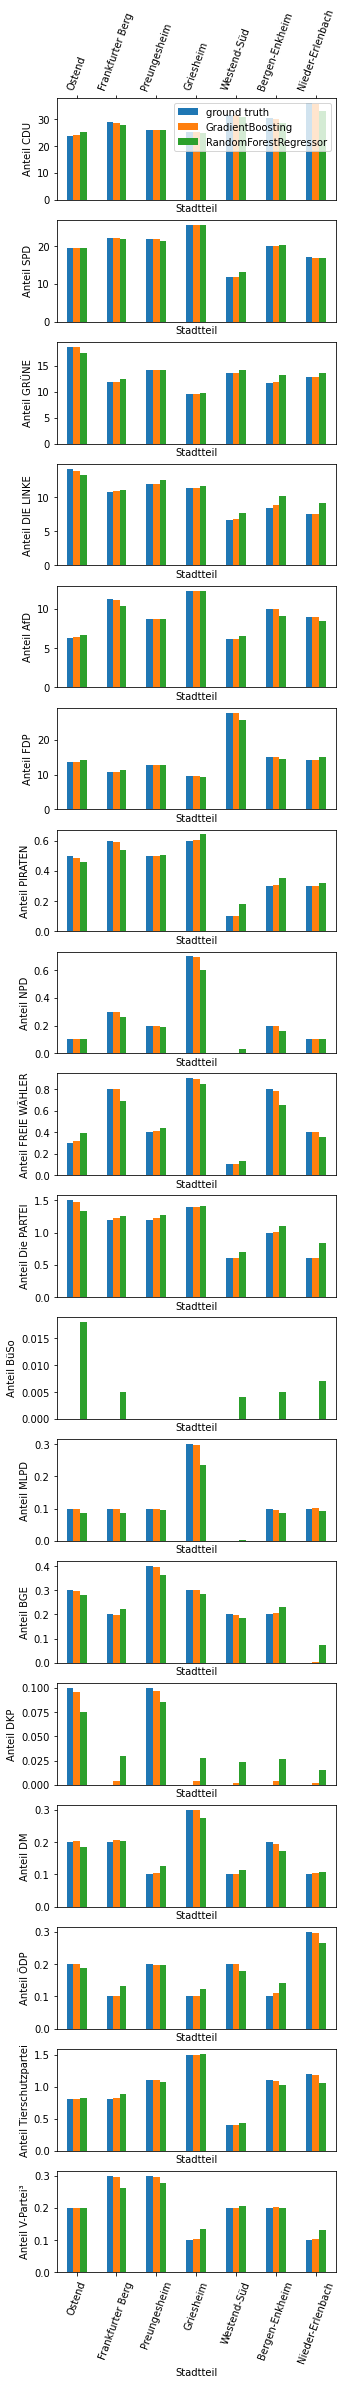

In [18]:
import matplotlib.pyplot as plt
def plotAll(dfs,columnNames):
    fig, axes = plt.subplots(nrows=len(list(ytest)),
                             ncols=1, 
                             sharex=False, 
                             sharey='row', 
                             figsize=(5,40)
                            )
                            
    for i,stadtteil in enumerate(list(ytest)):
        
        df_stadtteil = pd.DataFrame(index=ytest.index)
        df_stadtteil['ground truth'] = ytest[stadtteil]
        for j, df in enumerate(dfs):
            df_stadtteil[columnNames[j]] = df[stadtteil]
        df_stadtteil.plot.bar(ax=axes[i], legend=(i==0))
        axes[i].set_ylabel(stadtteil)
        axes[i].tick_params(
            axis = 'x',    
            which = 'both',
            bottom = (i==len(list(ytest))-1), 
            top = (i==0),      
            labelbottom = (i==len(list(ytest))-1),
            labeltop = (i==0),
            rotation=70
        )
        
        
    #handles, labels = axes[-1,-1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right')
    fig.savefig('./output/predict_parties_test.png', 
                format='png', 
                bbox_inches = 'tight',
                pad_inches = 0
               )

    
plotAll([df_ypredGradientBoosting, df_ypredRandomForestRegressor]
        ,['GradientBoosting','RandomForestRegressor'])


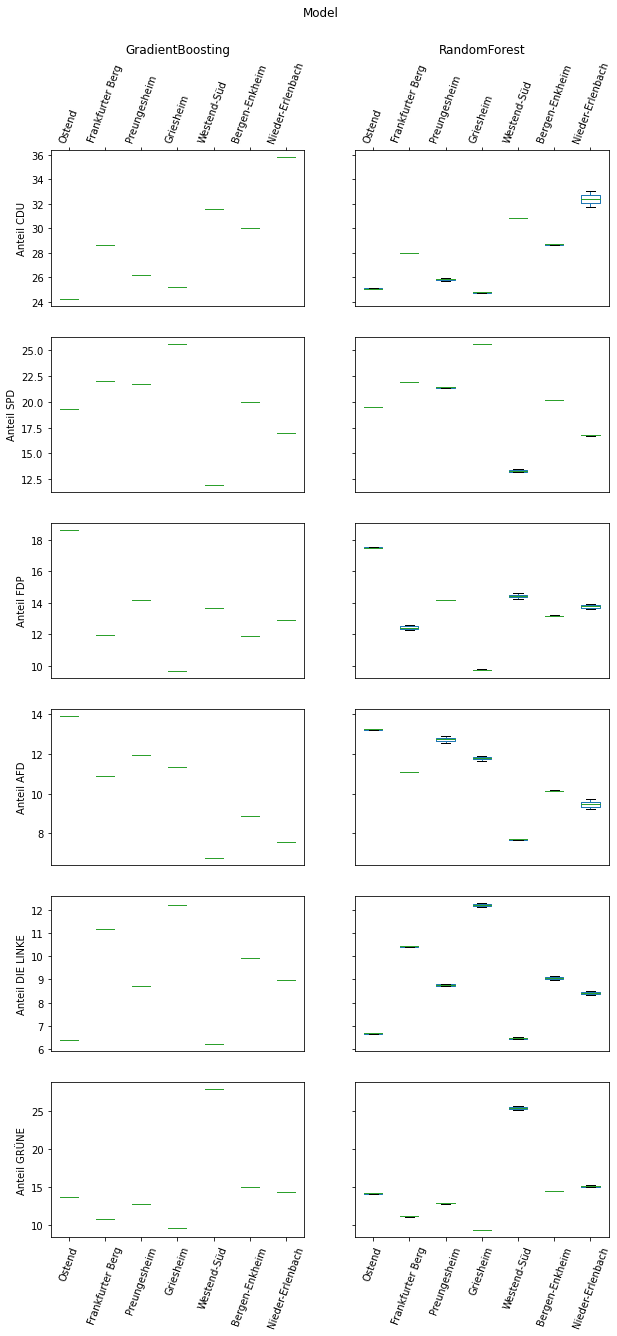

In [19]:

dfs_GradientBoosting  = [pd.DataFrame(ypredGradientBoosting,index=ytest.index,columns=list(ytest))
                         for ypredGradientBoosting in ypredGradientBoostingList]
dfs_RandomForest  = [pd.DataFrame(ypredRandomForest,index=ytest.index,columns=list(ytest)) 
                     for ypredRandomForest in ypredRandomForestList]

df_parteien_GradientBoosting_List = [pd.DataFrame([df[party] for df in dfs_GradientBoosting],index=range(timesTrained)) for party in list(ytest)]
df_parteien_RandomForest_List = [pd.DataFrame([df[party] for df in dfs_RandomForest],index=range(timesTrained)) for party in list(ytest)]


interessanteParteien = ['Anteil CDU','Anteil SPD', 'Anteil FDP', 'Anteil AFD', 'Anteil DIE LINKE', 'Anteil GRÜNE']

fig, axes = plt.subplots(nrows=len(list(interessanteParteien)),
                         ncols=timesTrained, 
                         sharex=False, 
                         sharey='row', 
                         figsize=(10,20)
                        )
for i, name in enumerate(list(interessanteParteien)):
    for j,df_list in enumerate([df_parteien_GradientBoosting_List, df_parteien_RandomForest_List]):
        df = df_list[i]
        df.plot.box(ax=axes[i,j],legend=(i==0))
        axes[i,j].set_ylabel(name)
        axes[i,j].tick_params(
            axis = 'x',    
            which = 'both',
            bottom = (i==len(list(interessanteParteien))-1), 
            top = (i==0),      
            labelbottom = (i==len(list(interessanteParteien))-1),
            labeltop = (i==0),
            rotation=70
        )
for j, name in enumerate(['GradientBoosting','RandomForest']):
    axes[0,j].set_title(name)
fig.suptitle('Model')
plt.show()
fig.savefig('./output/predict_parties_boxplot.png', 
            format='png', 
            bbox_inches = 'tight',
            pad_inches = 0
           )


In [ ]:


#df_CDU_GradientBoosting = pd.DataFrame([ypredGradientBoosting['Anteil CDU'] for ypredGradientBoosting in ypredGradientBoostingList])


#df_ypredGradientBoosting = pd.DataFrame(ypredGradientBoosting,index=ytest.index,columns=list(ytest))
#df_ypredRandomForestRegressor = pd.DataFrame(ypredRandomForestRegressor,index=ytest.index,columns=list(ytest))
#display(df_ypredGradientBoosting.head())
#display(df_ypredRandomForestRegressor.head())#

#import matplotlib.pyplot as plt
#def boxplotAll(dfs,columnNames):
#    fig, axes = plt.subplots(nrows=len(list(ytest)),
#                             ncols=1, 
#                             sharex=False, 
#                             sharey='row', 
#                             figsize=(5,40)
#                            )
#                            
#    for i,stadtteil in enumerate(list(ytest)):
#        
#        df_stadtteil = pd.DataFrame(index=ytest.index)
#        df_stadtteil['ground truth'] = ytest[stadtteil]
#        for j, df in enumerate(dfs):
#            df_stadtteil[columnNames[j]] = df[stadtteil]
#        df_stadtteil.plot.bar(ax=axes[i], legend=(i==0))
#        axes[i].set_ylabel(stadtteil)
#        axes[i].tick_params(
#            axis = 'x',    
#            which = 'both',
#            bottom = (i==len(list(ytest))-1), #
#            top = (i==0),      
#            labelbottom = (i==len(list(ytest))-1),
#            labeltop = (i==0),
#            rotation=70
#        )
        
        
    #handles, labels = axes[-1,-1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right')
#    fig.savefig('./output/predict_parties_boxplot.png', 
#                format='png', 
#                bbox_inches = 'tight',
#                pad_inches = 0
#               )

    
#plotAll([df_ypredGradientBoosting, df_ypredRandomForestRegressor]
#        ,['GradientBoosting','RandomForestRegressor'])


In [23]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import datasets, linear_model
estimator = MultiOutputRegressor(estimator=GradientBoostingRegressor)
#help(estimator )
lasso = linear_model.Lasso()
validated = cross_validate(estimator, X, Y)
#display(Y.head())
validated

/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/multioutput.py", line 172, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/xyntek/miniconda3/envs/datascience/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/xyntek/miniconda3/env

{'fit_time': array([0.00767541, 0.00974727, 0.00865746, 0.0046947 , 0.00405169]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [49]:
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import ShuffleSplit

boosting = MultiOutputRegressor(estimator=GradientBoostingRegressor())
forest = MultiOutputRegressor(estimator=RandomForestRegressor())



display(cross_val_score(boosting, X, Y, cv=ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)))
display(cross_val_score(forest, X, Y, cv=ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)))

array([-1.12949126e+00, -3.56659905e-01, -1.24656858e+00, -2.56254608e+00,
       -2.76585751e-03, -5.13516822e-01, -2.11538535e+00, -4.10364286e-02,
       -7.22109273e-01, -3.36448127e+00])

array([-0.31249517, -0.05245859, -0.66327788, -1.7225018 ,  0.12226723,
       -0.23958171, -1.41281027,  0.06855261, -0.17952721, -2.54713749])

In [117]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from numpy.random import RandomState
from sklearn.metrics import r2_score
def custom_cross_val_score(regressor, X, y, test_size=0.15, seed=1, repeats=1, scorer=None): 
    if scorer == None:
         scorer = (lambda y_test, y_pred : r2_score(y_test,
                                                    y_pred,
                                                    sample_weight=None,
                                                    multioutput='uniform_average'))
    
    random_state = RandomState(seed)
    for i in range (repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        current_reg = deepcopy(regressor)
        current_reg.fit(X_train,y_train)
        y_pred = current_reg.predict(X_test)
        cur_df = pd.DataFrame(index=y_test.index,columns=list(y_test),data=y_pred)
        score = scorer(y_test, y_pred)
        yield(score,y_test,cur_df)

        
myscorer = lambda y_test, y_pred : r2_score(y_test, y_pred, sample_weight=None, multioutput='raw_values')        
boosting = MultiOutputRegressor(estimator=GradientBoostingRegressor())
forest = MultiOutputRegressor(estimator=RandomForestRegressor())
for data in custom_cross_val_score(boosting, X, Y,repeats=1):
    display(*data)
for data in custom_cross_val_score(boosting, X, Y,repeats=1,scorer=myscorer):
    display(*data)

-0.651891492514083

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20,0.40,0.10,0.10,0.70,0.00,0.00,0.10,0.10,0.20,0.10,0.40,0.20
Westend-Süd,31.60,11.90,13.60,6.70,6.20,27.90,0.10,0.00,0.10,0.60,0.00,0.00,0.20,0.00,0.10,0.20,0.40,0.20
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30,0.40,0.10,0.50,1.00,0.10,0.00,0.30,0.10,0.10,0.20,1.00,0.20
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50,0.50,0.30,0.90,1.20,0.00,0.10,0.30,0.00,0.10,0.20,1.00,0.20
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70,0.70,0.20,0.50,1.70,0.00,0.10,0.30,0.10,0.30,0.20,1.00,0.30
Fechenheim,24.80,25.60,10.50,12.60,11.60,9.00,0.80,0.30,0.70,1.40,0.00,0.00,0.40,0.10,0.20,0.10,1.50,0.20
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30,0.40,0.20,0.60,1.40,0.00,0.10,0.20,0.00,0.30,0.40,1.00,0.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,32.75,15.72,13.30,8.09,7.22,18.09,0.47,0.10,0.35,1.01,0.00,0.00,0.21,0.10,0.10,0.22,0.86,0.30
Westend-Süd,36.06,15.64,17.55,6.15,8.67,18.09,0.32,0.13,0.36,1.20,0.00,0.01,0.18,0.06,0.11,0.22,0.84,0.28
Eschersheim,30.78,19.48,11.84,8.61,10.05,14.12,0.35,0.19,0.79,1.11,0.00,0.10,0.19,0.02,0.20,0.11,1.19,0.18
Nieder-Eschbach,25.94,22.24,13.76,12.44,8.23,12.36,0.38,0.24,0.49,1.22,0.00,0.03,0.27,0.02,0.12,0.13,0.69,0.22
Rödelheim,28.47,22.35,13.36,10.66,8.77,11.61,0.41,0.21,0.69,1.23,0.00,0.09,0.33,0.08,0.16,0.15,0.82,0.28
Fechenheim,25.22,25.53,11.42,11.38,11.90,9.34,0.60,0.70,0.83,1.51,0.00,0.30,0.29,0.00,0.30,0.10,1.21,0.10
Ginnheim,29.02,22.02,11.55,10.41,11.46,11.02,0.53,0.30,0.77,1.24,0.00,0.01,0.21,0.03,0.20,0.08,0.88,0.30


array([-1.07227743,  0.85866085, -0.77440523, -0.09161733, -0.04839134,
        0.59114049,  0.27470077, -1.67437446,  0.12172506,  0.23048964,
       -0.16666667, -5.50980624,  0.28597384, -0.31029817, -0.26393029,
       -1.20963881,  0.38246522, -3.38174263])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20,0.40,0.10,0.10,0.70,0.00,0.00,0.10,0.10,0.20,0.10,0.40,0.20
Westend-Süd,31.60,11.90,13.60,6.70,6.20,27.90,0.10,0.00,0.10,0.60,0.00,0.00,0.20,0.00,0.10,0.20,0.40,0.20
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30,0.40,0.10,0.50,1.00,0.10,0.00,0.30,0.10,0.10,0.20,1.00,0.20
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50,0.50,0.30,0.90,1.20,0.00,0.10,0.30,0.00,0.10,0.20,1.00,0.20
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70,0.70,0.20,0.50,1.70,0.00,0.10,0.30,0.10,0.30,0.20,1.00,0.30
Fechenheim,24.80,25.60,10.50,12.60,11.60,9.00,0.80,0.30,0.70,1.40,0.00,0.00,0.40,0.10,0.20,0.10,1.50,0.20
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30,0.40,0.20,0.60,1.40,0.00,0.10,0.20,0.00,0.30,0.40,1.00,0.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP,Anteil PIRATEN,Anteil NPD,Anteil FREIE WÄHLER,Anteil Die PARTEI,Anteil BüSo,Anteil MLPD,Anteil BGE,Anteil DKP,Anteil DM,Anteil ÖDP,Anteil Tierschutzpartei,Anteil V-Partei³
Stadtteil,,,,,,,,,,,,,,,,,,
Westend-Nord,32.71,15.76,13.25,8.18,7.25,18.02,0.51,0.10,0.34,0.92,0.00,0.00,0.21,0.10,0.10,0.23,0.85,0.30
Westend-Süd,36.06,15.67,16.99,6.26,8.68,17.94,0.35,0.14,0.39,1.24,0.00,0.01,0.18,0.07,0.11,0.22,0.80,0.28
Eschersheim,32.06,19.56,11.91,8.61,9.98,13.99,0.34,0.19,0.79,1.11,0.00,0.10,0.18,0.02,0.20,0.11,1.16,0.18
Nieder-Eschbach,25.84,22.26,13.76,12.44,8.23,12.36,0.38,0.24,0.48,1.22,0.00,0.03,0.27,0.01,0.12,0.13,0.73,0.22
Rödelheim,28.47,22.35,13.36,10.55,8.77,11.61,0.41,0.21,0.64,1.23,0.00,0.09,0.33,0.07,0.16,0.15,0.94,0.28
Fechenheim,25.22,25.53,11.48,11.38,11.86,9.34,0.60,0.70,0.82,1.50,0.00,0.30,0.29,0.00,0.30,0.10,1.21,0.10
Ginnheim,29.02,21.94,11.65,10.23,11.58,11.02,0.52,0.30,0.77,1.22,0.00,0.01,0.21,0.03,0.20,0.08,0.92,0.30


In [110]:
only_big_Y = Y[['Anteil CDU','Anteil SPD','Anteil GRÜNE','Anteil DIE LINKE','Anteil AfD','Anteil FDP']]

pd.options.display.float_format = "{:,.2f}".format
for data in custom_cross_val_score(boosting, X, only_big_Y, repeats=10):
    display(*data)

-0.044953548223270245

array([-0.84934857,  0.85409349, -0.76462016, -0.09704878, -0.01636267,
        0.6035654 ])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20
Westend-Süd,31.60,11.90,13.60,6.70,6.20,27.90
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70
Fechenheim,24.80,25.60,10.50,12.60,11.60,9.00
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Westend-Nord,32.74,15.89,13.25,8.06,7.16,18.34
Westend-Süd,36.06,15.74,17.04,6.25,8.67,18.00
Eschersheim,30.62,19.48,12.00,8.61,10.05,14.36
Nieder-Eschbach,26.18,22.32,13.76,12.44,8.23,12.36
Rödelheim,28.47,22.35,13.41,10.55,8.77,11.61
Fechenheim,25.22,25.53,11.42,11.38,11.93,9.34
Ginnheim,29.02,22.02,11.60,10.23,11.34,11.02


-0.06737294448532143

array([-1.45080849,  0.61228346,  0.40718768, -1.00308826,  0.37969894,
        0.650489  ])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Bockenheim,22.50,19.00,19.10,14.10,6.00,15.10
Eckenheim,24.40,24.10,12.30,14.30,9.20,10.10
Innenstadt,26.00,15.30,15.00,13.70,7.80,16.90
Nied,26.70,24.50,8.80,10.50,14.20,10.20
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Riederwald,17.50,29.60,9.70,18.80,13.10,5.50
Dornbusch,27.30,19.20,15.20,11.80,7.50,15.60


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Bockenheim,32.03,17.62,15.48,9.49,6.52,13.29
Eckenheim,26.28,23.41,12.10,11.58,12.25,9.43
Innenstadt,26.76,20.17,14.95,12.70,7.83,14.45
Nied,25.85,24.06,12.28,10.86,12.18,9.49
Nieder-Eschbach,26.47,22.39,14.62,11.59,8.01,12.51
Riederwald,28.44,25.08,8.48,10.10,13.19,9.54
Dornbusch,23.61,17.67,17.94,13.91,5.98,13.70


0.23003473282929776

array([-0.33175639,  0.71111738,  0.61636444,  0.25959176,  0.2656146 ,
       -0.1407234 ])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Seckbach,28.30,21.60,14.50,11.10,8.70,11.70
Niederrad,26.10,22.40,11.90,10.90,10.30,13.60
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Nordend-Ost,20.70,17.60,23.60,16.60,4.50,13.10
Praunheim,24.50,24.30,12.80,12.60,11.10,10.50
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Seckbach,25.47,23.78,13.42,11.80,10.33,10.53
Niederrad,26.76,23.35,10.94,11.30,11.77,10.66
Unterliederbach,26.94,24.22,11.43,10.69,10.69,10.66
Nordend-Ost,28.30,17.14,18.41,12.82,7.20,15.54
Praunheim,25.14,22.56,12.92,12.58,10.19,10.97
Bergen-Enkheim,27.64,19.56,15.10,12.17,8.14,13.77
Ginnheim,27.23,21.85,12.19,12.23,11.22,10.97


-0.03857065433935327

array([-1.83700592,  0.91722153,  0.19321533, -0.80526806,  0.50089751,
        0.79951569])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Sachsenhausen-Nord,27.10,15.90,18.60,10.30,5.80,19.20
Niederrad,26.10,22.40,11.90,10.90,10.30,13.60
Westend-Nord,28.70,15.90,16.20,9.40,5.20,22.20
Gutleutviertel,21.40,15.60,18.40,16.50,7.10,16.80
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Höchst,21.70,23.70,13.70,14.60,11.10,9.10


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Sachsenhausen-Nord,30.33,16.89,13.42,8.49,7.71,18.87
Niederrad,26.14,23.31,12.54,12.05,9.94,10.28
Westend-Nord,32.94,15.97,14.83,8.17,6.99,18.75
Gutleutviertel,33.28,17.15,13.84,8.79,8.20,14.73
Unterliederbach,28.46,23.61,9.84,9.76,11.49,10.98
Nieder-Eschbach,26.39,22.75,13.61,12.38,8.64,11.15
Höchst,26.22,23.17,12.11,11.44,12.57,10.47


-0.14405336285249581

array([-0.86473775,  0.41737544, -0.58565491, -0.50652288,  0.01160188,
        0.66361803])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Riederwald,17.50,29.60,9.70,18.80,13.10,5.50
Harheim,33.90,19.00,11.80,7.40,10.20,13.10
Sindlingen,29.30,25.90,8.10,9.00,13.60,8.20
Sachsenhausen-Süd,30.20,17.40,13.60,9.10,7.60,18.90
Seckbach,28.30,21.60,14.50,11.10,8.70,11.70
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Unterliederbach,27.13,24.36,10.86,10.74,11.69,10.10
Riederwald,29.18,22.70,8.47,9.81,12.16,10.21
Harheim,23.50,19.90,15.25,12.93,8.00,13.59
Sindlingen,27.16,23.77,8.65,9.78,14.24,9.74
Sachsenhausen-Süd,27.86,16.58,18.54,11.34,6.29,16.70
Seckbach,24.67,24.11,13.07,12.51,10.18,11.05
Nieder-Eschbach,25.56,22.28,13.74,12.10,8.13,12.82


0.15883007064614232

array([-0.6678548 ,  0.7652815 , -0.2450019 , -0.51449957,  0.71736388,
        0.89769132])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Harheim,33.90,19.00,11.80,7.40,10.20,13.10
Kalbach-Riedberg,33.60,16.90,12.80,7.20,7.40,18.30
Dornbusch,27.30,19.20,15.20,11.80,7.50,15.60
Innenstadt,26.00,15.30,15.00,13.70,7.80,16.90
Ostend,23.70,19.40,18.70,14.20,6.30,13.60
Sindlingen,29.30,25.90,8.10,9.00,13.60,8.20
Griesheim,25.30,25.60,9.60,11.30,12.20,9.60


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Harheim,26.87,19.83,14.02,12.44,8.00,13.78
Kalbach-Riedberg,23.87,15.90,21.35,12.86,4.79,17.80
Dornbusch,26.83,19.02,18.54,12.66,6.85,15.06
Innenstadt,26.32,19.82,14.60,13.21,7.46,14.81
Ostend,27.10,19.51,16.11,11.65,6.81,15.13
Sindlingen,27.08,24.79,8.95,11.68,14.07,8.84
Griesheim,24.63,25.61,10.48,12.66,11.69,9.03


-0.16908401221560476

array([-1.82879177,  0.70586636, -0.05522421, -0.70522012,  0.01442859,
        0.85443707])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Hausen,27.50,23.00,13.40,12.60,7.70,12.60
Höchst,21.70,23.70,13.70,14.60,11.10,9.10
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Gutleutviertel,21.40,15.60,18.40,16.50,7.10,16.80
Innenstadt,26.00,15.30,15.00,13.70,7.80,16.90
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Sachsenhausen-Nord,27.10,15.90,18.60,10.30,5.80,19.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Hausen,28.84,21.53,12.44,9.98,11.44,11.74
Höchst,26.88,23.03,11.96,12.41,12.62,10.24
Bergen-Enkheim,26.61,19.41,15.40,11.84,8.20,14.04
Gutleutviertel,32.95,17.47,13.99,9.19,8.69,14.17
Innenstadt,28.44,19.86,14.72,12.32,9.31,15.70
Unterliederbach,27.12,23.95,10.16,10.02,11.38,11.05
Sachsenhausen-Nord,30.42,17.03,13.36,8.48,7.76,18.84


-0.19218477558229327

array([-0.10288862,  0.36068225,  0.02919227, -0.42255843, -0.85231398,
       -0.16522214])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Gallus,24.40,18.10,13.40,12.70,9.50,17.30
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Unterliederbach,28.60,24.10,10.10,10.20,11.60,10.40
Frankfurter Berg,28.80,22.00,11.90,10.80,11.20,10.70
Gutleutviertel,21.40,15.60,18.40,16.50,7.10,16.80
Nieder-Erlenbach,36.10,17.00,12.90,7.50,9.00,14.30


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Gallus,22.02,23.50,10.74,12.33,12.07,9.74
Bergen-Enkheim,27.82,19.49,14.84,12.03,8.16,13.87
Nieder-Eschbach,27.07,22.85,13.90,12.19,8.70,12.02
Unterliederbach,28.82,23.70,9.89,9.84,12.04,10.43
Frankfurter Berg,27.41,21.89,13.89,13.24,8.62,11.84
Gutleutviertel,26.85,16.82,14.86,11.36,8.01,17.43
Nieder-Erlenbach,26.54,16.83,14.05,12.48,6.77,15.44


-0.10745371621318185

array([-1.54912536,  0.4532266 ,  0.33824308, -0.49877995,  0.20945985,
        0.40225348])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Nordend-Ost,20.70,17.60,23.60,16.60,4.50,13.10
Zeilsheim,31.10,24.30,7.80,8.20,14.50,8.90
Nieder-Eschbach,30.20,21.10,11.10,9.40,12.80,10.50
Bergen-Enkheim,30.40,20.00,11.70,8.50,10.00,15.10
Rödelheim,23.60,21.20,13.90,16.20,9.10,10.70
Seckbach,28.30,21.60,14.50,11.10,8.70,11.70
Sossenheim,30.20,22.70,8.10,9.70,13.60,10.10


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Nordend-Ost,28.33,17.12,19.02,12.74,6.98,15.28
Zeilsheim,21.94,22.90,16.45,14.42,9.06,10.12
Nieder-Eschbach,25.56,22.30,13.39,12.65,8.81,12.22
Bergen-Enkheim,28.56,19.38,14.01,11.72,8.60,13.64
Rödelheim,28.47,22.68,13.16,12.07,8.89,11.66
Seckbach,25.02,24.33,13.00,12.86,10.29,10.88
Sossenheim,23.35,23.60,10.22,14.03,12.59,8.50


-3.657279080804546

array([ -1.19364985,   0.73202529, -19.86670075,  -1.03201761,
        -1.46038123,   0.87704966])

,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Höchst,21.70,23.70,13.70,14.60,11.10,9.10
Eschersheim,27.60,19.40,15.70,11.50,7.50,14.30
Ginnheim,23.90,22.60,14.00,14.10,8.40,12.30
Kalbach-Riedberg,33.60,16.90,12.80,7.20,7.40,18.30
Dornbusch,27.30,19.20,15.20,11.80,7.50,15.60
Preungesheim,26.10,21.80,14.20,11.90,8.70,12.70
Altstadt,26.30,17.60,14.60,13.00,8.30,15.20


,Anteil CDU,Anteil SPD,Anteil GRÜNE,Anteil DIE LINKE,Anteil AfD,Anteil FDP
Stadtteil,,,,,,
Höchst,26.56,23.27,11.65,12.18,12.71,10.41
Eschersheim,31.34,19.39,11.79,8.62,9.98,14.09
Ginnheim,27.86,21.93,12.71,12.60,11.21,10.92
Kalbach-Riedberg,23.75,15.96,21.79,13.32,4.95,17.78
Dornbusch,22.46,19.31,18.88,14.22,6.33,14.20
Preungesheim,25.88,19.55,13.37,15.37,9.41,12.83
Altstadt,28.79,19.62,14.83,12.36,8.00,14.59
